In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
df = pd.read_csv('Data/Taxi.csv')
data_dictionary = pd.read_excel('Data/taxi_dic.xlsx')

# EDA

In [4]:
data_dictionary

,Column name,Description
0,ID,Trip identification number
1,VendorID,A code indicating the TPEP provider that provi...
2,NaN,NaN
3,NaN,"1= Creative Mobile Technologies, LLC;"
4,NaN,NaN
5,NaN,2= VeriFone Inc.
6,tpep_pickup_datetime,The date and time when the meter was engaged.
7,tpep_dropoff_datetime,The date and time when the meter was disengaged.
8,Passenger_count,The number of passengers in the vehicle.
9,NaN,NaN


In [5]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [6]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [7]:
df = df.drop(['RatecodeID','store_and_fwd_flag','extra','mta_tax','improvement_surcharge'],axis=1)

In [8]:
date_cols = df[['tpep_pickup_datetime','tpep_dropoff_datetime']]

In [10]:
for i in date_cols:
    df[i] = pd.to_datetime(df[i])

In [11]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

In [12]:
df['pickup_hour'].value_counts()

19    1454
18    1449
20    1295
21    1281
14    1224
17    1216
22    1213
15    1167
16    1132
13    1127
12    1114
9     1112
11    1088
10    1040
8     1020
23    1006
7      857
0      737
1      525
6      499
2      386
3      287
4      235
5      235
Name: pickup_hour, dtype: int64

In [13]:
df['duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df_period0 = df[df['duration_minutes']== 0 ]

In [14]:
df.loc[df['duration_minutes'] < 0,'duration_minutes'] = 0

In [15]:
print(df.loc[df['total_amount'] < 0,'total_amount'])
print(df.loc[df['fare_amount'] < 0,'fare_amount'])

314       -3.8
1646      -3.3
4423      -4.3
5448      -4.3
5758      -3.8
8204      -4.8
10281     -4.3
11204     -5.3
12944   -120.3
14714     -5.3
17602     -5.8
18565     -3.8
20317     -4.8
20698     -5.8
Name: total_amount, dtype: float64
314       -2.5
1646      -2.5
4423      -3.0
5448      -3.5
5758      -2.5
8204      -3.5
10281     -2.5
11204     -4.5
12944   -120.0
14714     -4.0
17602     -4.0
18565     -3.0
20317     -3.5
20698     -4.5
Name: fare_amount, dtype: float64


In [16]:
df = df.drop(df[df['fare_amount']<0]['fare_amount'].index)

In [17]:
def outlier(cols,iqr_factor):

    for col in cols:
        df.loc[df[col] < 0 ,col] = 0
    
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        upper = q3 + iqr*iqr_factor
        df.loc[df[col] > upper,col] = upper
        print(df[col].describe())

In [18]:
outlier(['fare_amount','total_amount','duration_minutes'],8)

count    22685.000000
mean        12.943362
std         10.737644
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         78.500000
Name: fare_amount, dtype: float64
count    22685.000000
mean        16.202658
std         13.231729
min          0.000000
25%          8.750000
50%         11.800000
75%         17.800000
max         90.200000
Name: total_amount, dtype: float64
count    22685.000000
mean        14.523675
std         12.352746
min          0.000000
25%          6.666667
50%         11.183333
75%         18.383333
max        112.116667
Name: duration_minutes, dtype: float64


In [19]:
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

In [20]:
df_distance0 = df[df['trip_distance'] == 0]
print(df[df['trip_distance']==0].count())

Unnamed: 0               147
VendorID                 147
tpep_pickup_datetime     147
tpep_dropoff_datetime    147
passenger_count          147
trip_distance            147
PULocationID             147
DOLocationID             147
payment_type             147
fare_amount              147
tip_amount               147
tolls_amount             147
total_amount             147
pickup_hour              147
duration_minutes         147
day                      147
month                    147
dtype: int64


In [21]:
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
tip_amount               0
tolls_amount             0
total_amount             0
pickup_hour              0
duration_minutes         0
day                      0
month                    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22685 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22685 non-null  int64         
 1   VendorID               22685 non-null  int64         
 2   tpep_pickup_datetime   22685 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22685 non-null  datetime64[ns]
 4   passenger_count        22685 non-null  int64         
 5   trip_distance          22685 non-null  float64       
 6   PULocationID           22685 non-null  int64         
 7   DOLocationID           22685 non-null  int64         
 8   payment_type           22685 non-null  int64         
 9   fare_amount            22685 non-null  float64       
 10  tip_amount             22685 non-null  float64       
 11  tolls_amount           22685 non-null  float64       
 12  total_amount           22685 non-null  float64       
 13  p

In [23]:
df.describe(include='all')

C:\Users\Ne\AppData\Local\Temp/ipykernel_13476/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,pickup_hour,duration_minutes,day,month
count,2.268500e+04,22685.000000,22685,22685,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685,22685
unique,NaN,NaN,22673,22674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,12
top,NaN,NaN,2017-11-23 14:28:08,2017-11-15 11:20:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,March
freq,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3411,2048
first,NaN,NaN,2017-01-01 00:08:25,2017-01-01 00:17:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675861e+07,1.555962,NaN,NaN,1.642231,2.914952,162.421732,161.544545,1.335552,12.943362,1.836914,0.312734,16.202658,13.726780,14.523675,NaN,NaN
std,3.274427e+07,0.496869,NaN,NaN,1.285034,3.653698,66.632736,70.136002,0.493288,10.737644,2.801119,1.399622,13.231729,6.223532,12.352746,NaN,NaN
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2.852087e+07,1.000000,NaN,NaN,1.000000,0.990000,114.000000,112.000000,1.000000,6.500000,0.000000,0.000000,8.750000,9.000000,6.666667,NaN,NaN


In [24]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,pickup_hour,duration_minutes,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,100,231,1,13.0,2.76,0.0,16.56,8,14.066667,Saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,186,43,1,16.0,4.00,0.0,20.80,14,26.500000,Tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,262,236,1,6.5,1.45,0.0,8.75,7,7.200000,Friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,188,97,1,20.5,6.39,0.0,27.69,13,30.250000,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,4,112,2,16.5,0.00,0.0,17.80,23,16.716667,Saturday,April


In [25]:
print(df['VendorID'].value_counts())
print(df['payment_type'].value_counts())

2    12612
1    10073
Name: VendorID, dtype: int64
1    15265
2     7267
3      114
4       39
Name: payment_type, dtype: int64


In [26]:
df['duration_by_distance'] = df['duration_minutes'] / df['trip_distance']
df.loc[df['trip_distance'] == 0 ,'duration_by_distance'] = 0

In [27]:
period_by_distance = pd.DataFrame(df.groupby('pickup_hour')['duration_by_distance'].mean())

In [28]:
time_use = pd.DataFrame(df.groupby('pickup_hour')['duration_minutes'].mean())

In [29]:
time_use

,duration_minutes
pickup_hour,
0,12.623039
1,11.661016
2,12.132771
3,12.163298
4,11.743830
5,11.639787
6,11.241750
7,12.199221
8,13.978431


# Data visualization
box plot
histrogram
scatter
bar chart
line chart


<AxesSubplot:title={'center':'Number of user by time'}, xlabel='pickup_hour', ylabel='Count'>

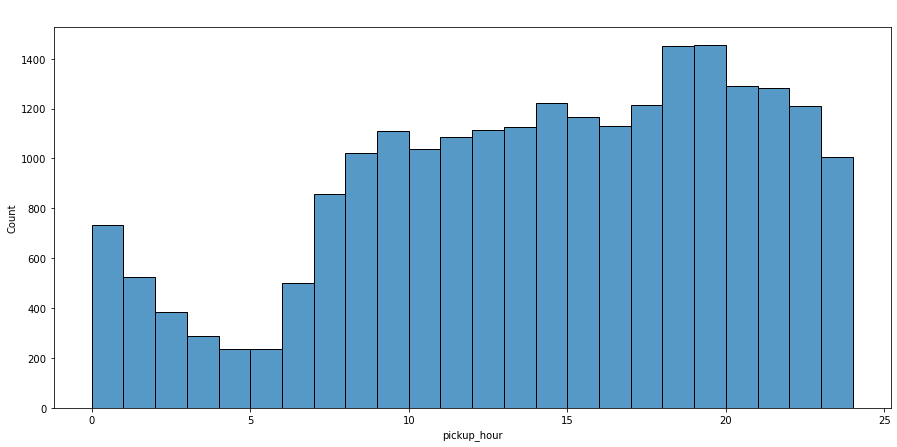

In [30]:
plt.figure(figsize=(15,7))
plt.title('Number of user by time',color='white',size = 20)
sns.histplot(df['pickup_hour'],bins=range(0,25,1))

<AxesSubplot:title={'center':'trip distance'}, xlabel='trip_distance'>

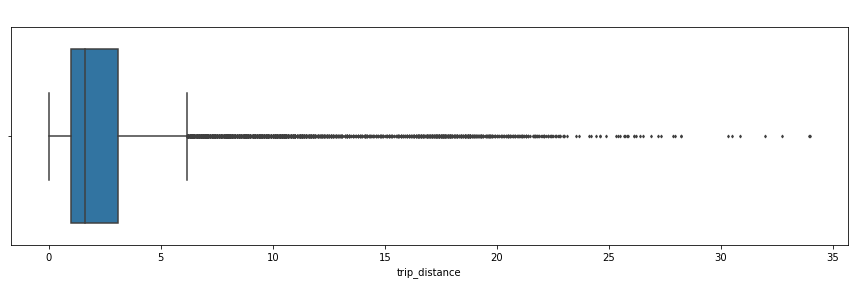

In [31]:
plt.figure(figsize=(15,4))
plt.title('trip distance',color='white',size = 20)
sns.boxplot(data=df,x='trip_distance',fliersize=2)

<AxesSubplot:title={'center':'trip distance'}, xlabel='trip_distance', ylabel='Count'>

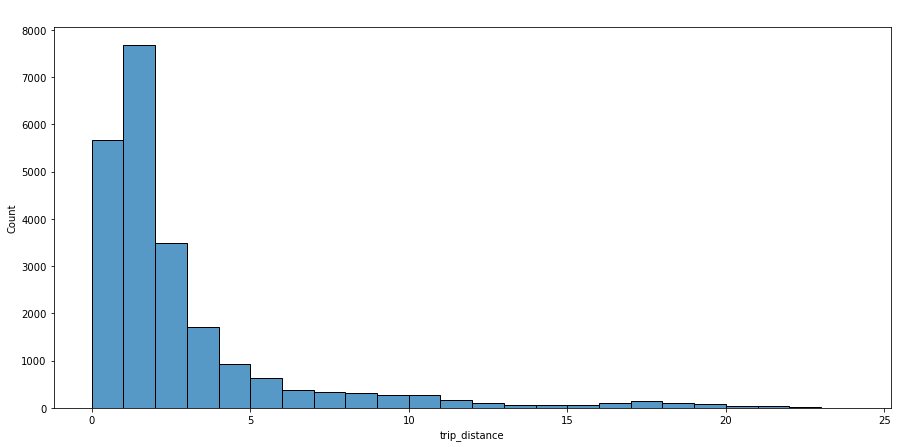

In [32]:
plt.figure(figsize=(15,7))
plt.title('trip distance',color='white',size = 20)
sns.histplot(df['trip_distance'],bins=range(0,25,1))


<AxesSubplot:title={'center':'tip amount'}, xlabel='tip_amount'>

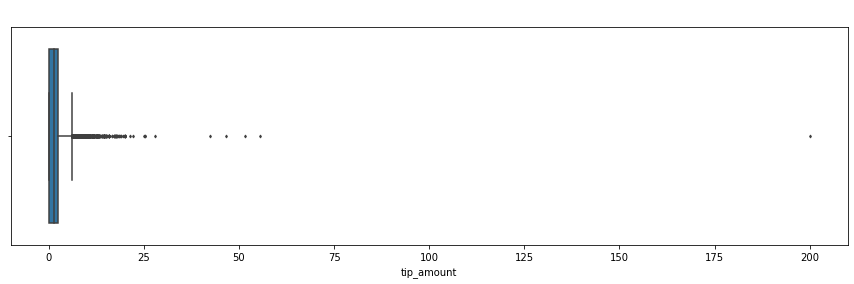

In [33]:
plt.figure(figsize=(15,4))
plt.title('tip amount',size = 20,color='white')
sns.boxplot(data=df,x='tip_amount',fliersize=2)

Text(0.5, 1.0, 'Tip amount by vendor')

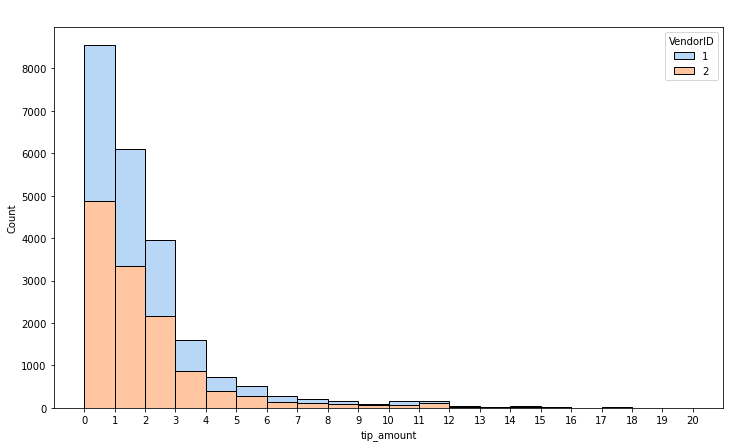

In [34]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df,x='tip_amount',bins=range(0,21,1),
                 hue = 'VendorID',
                 multiple='stack',
                 palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor',size = 20 ,color= 'white')

<AxesSubplot:title={'center':'total amount'}, xlabel='total_amount'>

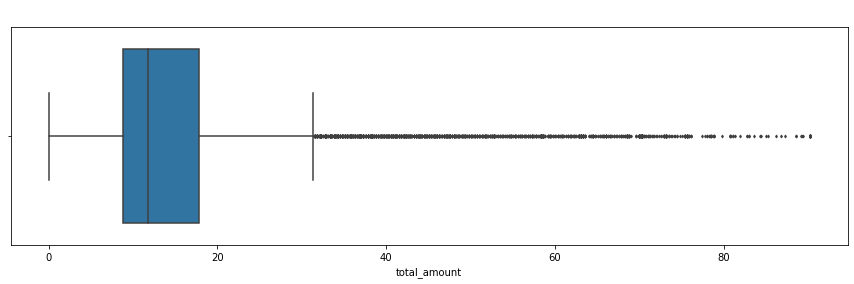

In [35]:
plt.figure(figsize=(15,4))
plt.title('total amount',color = 'white',size=20)
sns.boxplot(data=df,x='total_amount',fliersize=2)

Text(0.5, 1.0, 'Total amount by vendor')

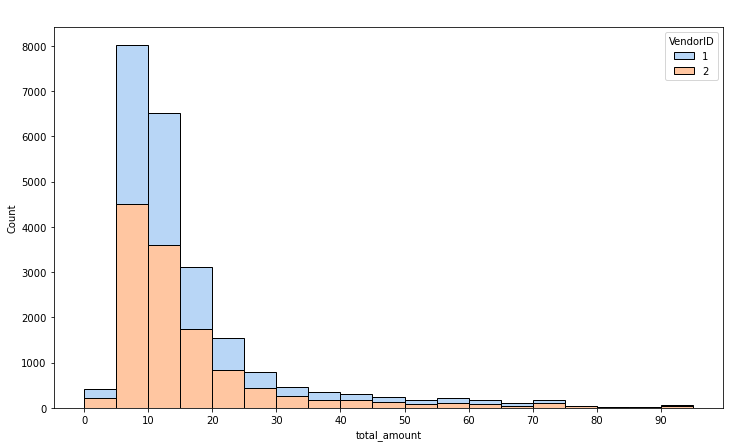

In [36]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df,x='total_amount',bins=range(0,100,5),
                 hue = 'VendorID',
                 multiple='stack',
                 palette='pastel')
ax.set_xticks(range(0,100,10))
ax.set_xticklabels(range(0,100,10))
plt.title('Total amount by vendor',size = 20 ,color= 'white')

In [37]:
df['passenger_count'].value_counts()

1    16107
2     3303
5     1142
3      953
6      692
4      455
0       33
Name: passenger_count, dtype: int64

<AxesSubplot:title={'center':'passenger count'}, xlabel='passenger_count', ylabel='Count'>

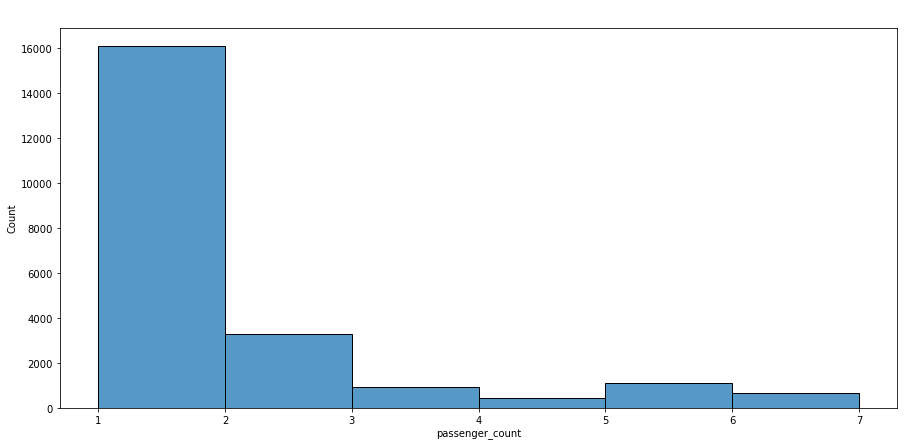

In [38]:
plt.figure(figsize=(15,7))
plt.title('passenger count',size = 20,color='white')
sns.histplot(data=df,x='passenger_count',bins=range(1,8,1))

<AxesSubplot:title={'center':'average time spent(minutes)'}, xlabel='pickup_hour', ylabel='duration_minutes'>

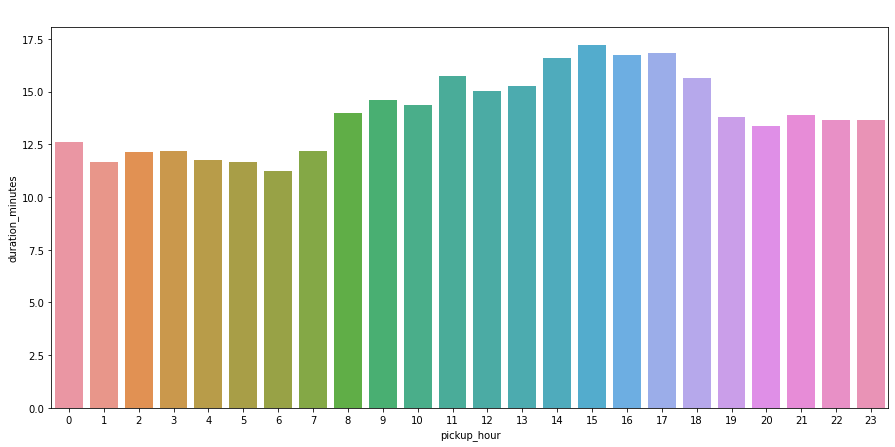

In [39]:
plt.figure(figsize=(15,7))
plt.title('average time spent(minutes)',color='white',size = 20)
sns.barplot(x=time_use.index,y=time_use['duration_minutes'])

<AxesSubplot:title={'center':'duration by distance'}, xlabel='pickup_hour', ylabel='duration_by_distance'>

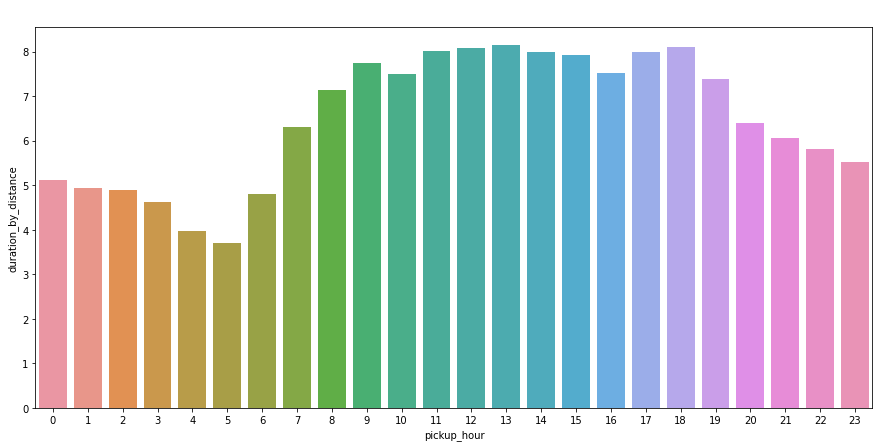

In [40]:
plt.figure(figsize=(15,7))
plt.title('duration by distance',color='white',size = 20)
sns.barplot(x=period_by_distance.index,y=period_by_distance['duration_by_distance'])

In [41]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
users_by_day = pd.DataFrame(df.groupby('day')['day'].count()).reindex(index=day_order)

Text(0.5, 0, 'day')

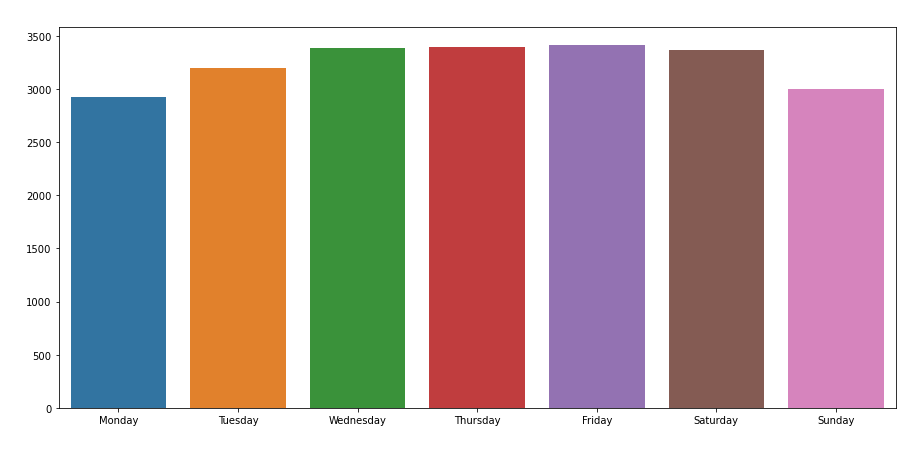

In [42]:
plt.figure(figsize=(15,7))
plt.title('Number of ride count',color='white',size = 20)
ax = sns.barplot(x=users_by_day.index,y=users_by_day['day'])
ax.set_ylabel('number of ride count',color='white',size=15)
ax.set_xlabel('day',color='white',size=15)

In [43]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
users_by_month = pd.DataFrame(df.groupby('month')['month'].count()).reindex(index=month_order)

Text(0.5, 0, 'month')

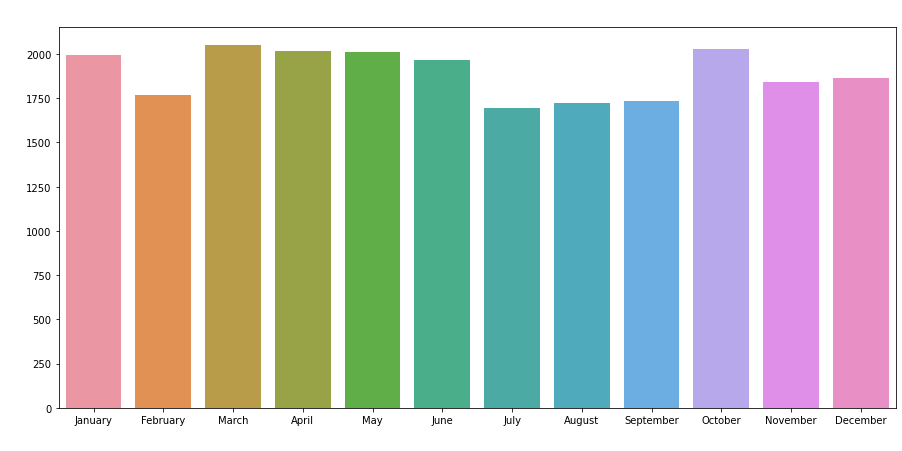

In [44]:
plt.figure(figsize=(15,7))
plt.title('Number of ride count',color='white',size = 20)
ax = sns.barplot(x=users_by_month.index,y=users_by_month
                 ['month'])
ax.set_ylabel('number of ride count',color='white',size=15)
ax.set_xlabel('month',color='white',size=15)

In [45]:
average_distance_by_day = pd.DataFrame(df.groupby('day')['trip_distance'].mean()).reindex(index=day_order)

Text(0.5, 0, 'day')

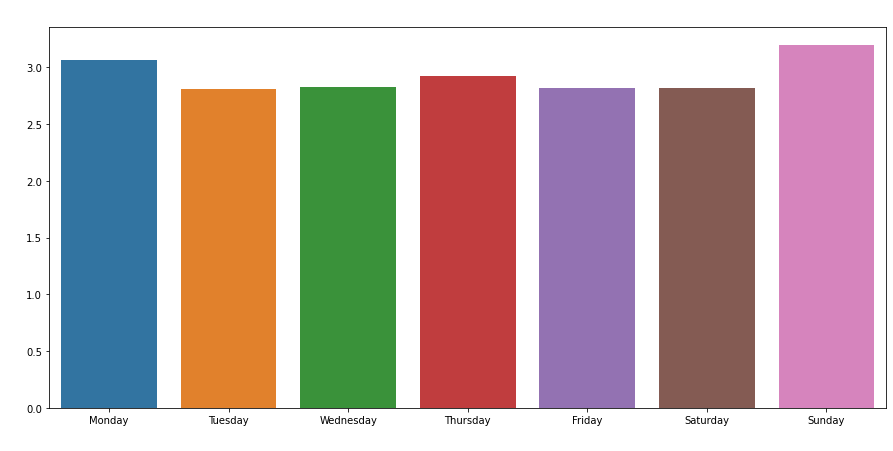

In [46]:
plt.figure(figsize=(15,7))
plt.title('Average distance',color='white',size = 20)
ax = sns.barplot(x=average_distance_by_day.index,y=average_distance_by_day
                 ['trip_distance'])
ax.set_ylabel('distance',color='white',size=15)
ax.set_xlabel('day',color='white',size=15)

In [47]:
average_distance_by_month = pd.DataFrame(df.groupby('month')['trip_distance'].mean()).reindex(index=month_order)

Text(0.5, 0, 'month')

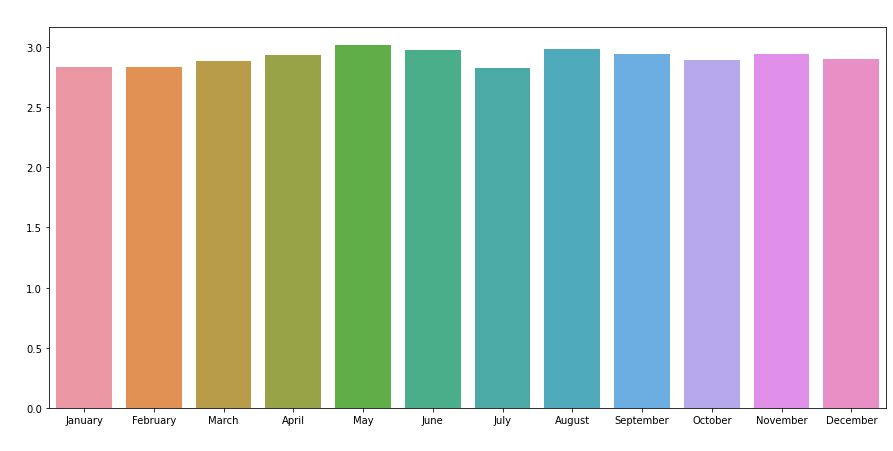

In [48]:
plt.figure(figsize=(15,7))
plt.title('Average distance',color='white',size = 20)
ax = sns.barplot(x=average_distance_by_month.index,y=average_distance_by_month
                 ['trip_distance'])
ax.set_ylabel('distance',color='white',size=15)
ax.set_xlabel('month',color='white',size=15)

In [49]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,pickup_hour,duration_minutes,day,month,duration_by_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,100,231,1,13.0,2.76,0.0,16.56,8,14.066667,Saturday,March,4.211577
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,186,43,1,16.0,4.00,0.0,20.80,14,26.500000,Tuesday,April,14.722222
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,262,236,1,6.5,1.45,0.0,8.75,7,7.200000,Friday,December,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,188,97,1,20.5,6.39,0.0,27.69,13,30.250000,Sunday,May,8.175676
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,4,112,2,16.5,0.00,0.0,17.80,23,16.716667,Saturday,April,3.825324


In [50]:
revenue_day = pd.DataFrame(df.groupby('day')['total_amount'].sum()).reindex(index=day_order)

Text(0.5, 0, 'day')

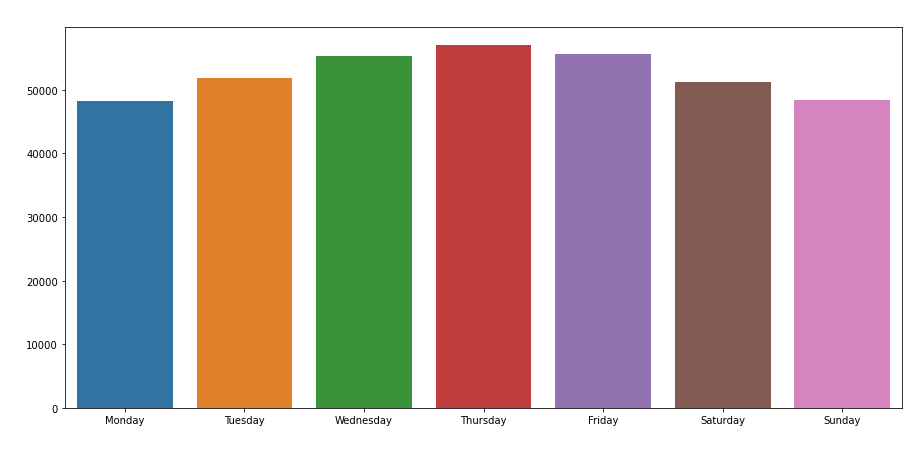

In [51]:
plt.figure(figsize=(15,7))
plt.title('Total revenue',color='white',size = 20)
ax = sns.barplot(x=revenue_day.index,y=revenue_day
                 ['total_amount'])
ax.set_ylabel('revenue',color='white',size=15)
ax.set_xlabel('day',color='white',size=15)

In [52]:
revenue_month = pd.DataFrame(df.groupby('month')['total_amount'].sum()).reindex(index=month_order)

Text(0.5, 0, 'month')

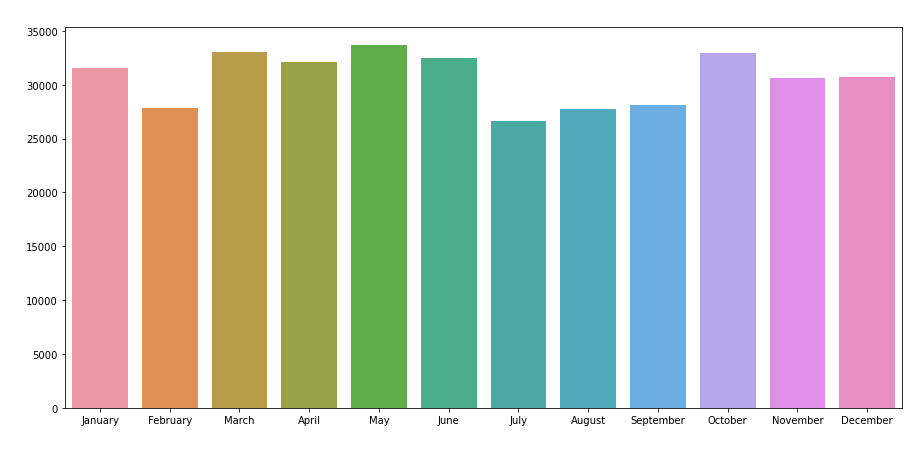

In [53]:
plt.figure(figsize=(15,7))
plt.title('Total revenue',color='white',size = 20)
ax = sns.barplot(x=revenue_month.index,y=revenue_month
                 ['total_amount'])
ax.set_ylabel('revenue',color='white',size=15)
ax.set_xlabel('month',color='white',size=15)

In [54]:
PU_count = pd.DataFrame(df['PULocationID'].value_counts()).sort_values('PULocationID',ascending=False)
PU_count = PU_count.reset_index().rename(columns={'PULocationID':'user_count','index':'PULocationID'})

In [55]:
PU_count.head()

,PULocationID,user_count
0,237,889
1,161,860
2,186,792
3,236,784
4,162,779


In [56]:
DO_count = pd.DataFrame(df['DOLocationID'].value_counts()).sort_values('DOLocationID',ascending=False)
DO_count = DO_count.reset_index().rename(columns={'DOLocationID':'user_count','index':'DOLocationID'})

In [57]:
DO_count.head()

,DOLocationID,user_count
0,161,856
1,236,802
2,230,761
3,237,757
4,170,698


In [58]:
use_tolls = pd.DataFrame(df[df['tolls_amount'] > 0].groupby('DOLocationID')['tolls_amount'].count()).sort_values('tolls_amount',ascending=False)   
use_tolls = use_tolls.rename(columns={'tolls_amount':'tolls_count'})

In [59]:
use_tolls.head()

,tolls_count
DOLocationID,
138,172
132,134
230,69
161,46
162,42


In [60]:
DO_airport = pd.DataFrame(df[df['tolls_amount'] > 0].groupby('DOLocationID')['tolls_amount'].count()).sort_values('tolls_amount',ascending=False)

# Hypothesis test
paymant type effects to total amount or not
Ho:average total amount between customers who credit cards and   
    customer who ues cash are equal
Ha:average total amount between customers who credit cards and   
    customer who ues cash are not equal(credit card > cash)
significant level = 5%

In [61]:
print('average tip by vendor',df[df['payment_type']==1]['tip_amount'].groupby(df['VendorID']).mean())
print('average total amount by vendor',df.groupby('VendorID')['total_amount'].mean())
print('average tip amount by payment type',df.groupby('payment_type')['tip_amount'].mean())
print('average total amount by payment type',df.groupby('payment_type')['total_amount'].mean())
print('average tip amount by passenger count',df[df['payment_type']==1]['tip_amount'].groupby(df['passenger_count']).mean())
print('average total amount by passenger count',df.groupby('passenger_count')['total_amount'].mean())

average tip by vendor VendorID
1    2.732815
2    2.727397
Name: tip_amount, dtype: float64
average total amount by vendor VendorID
1    16.150643
2    16.244202
Name: total_amount, dtype: float64
average tip amount by payment type payment_type
1    2.7298
2    0.0000
3    0.0000
4    0.0000
Name: tip_amount, dtype: float64
average total amount by payment type payment_type
1    17.511847
2    13.471743
3    14.668772
4    17.116923
Name: total_amount, dtype: float64
average tip amount by passenger count passenger_count
0    2.610370
1    2.714681
2    2.829949
3    2.726800
4    2.607753
5    2.762645
6    2.643326
Name: tip_amount, dtype: float64
average total amount by passenger count passenger_count
0    17.624242
1    15.960550
2    17.197442
3    16.592340
4    16.610110
5    16.281515
6    16.087254
Name: total_amount, dtype: float64


In [62]:
credit_card = df[df['payment_type']==1]['total_amount']
cash = df[df['payment_type']==2]['total_amount']

In [63]:
stats.ttest_ind(a=credit_card,b=cash, equal_var=False)

Ttest_indResult(statistic=23.472471488944887, pvalue=5.445140260779156e-120)

pvalue < 0.05 ; reject Ho
we should encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.

passenger count effects to total amount or not Ho:average total amount between 1 passenger and more then 1 passenger are equal Ha:average total amount between 1 passenger and more then 1 passenger are not equal   significant level = 5%

In [64]:
passenger1 = df[df['passenger_count']==1]['total_amount']
passenger2 = df[df['passenger_count']>1]['total_amount']

In [65]:
stats.ttest_ind(a=passenger1,b=passenger2, equal_var=False)

Ttest_indResult(statistic=-4.141614843744731, pvalue=3.4737726948814854e-05)

# Regression

In [66]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,pickup_hour,duration_minutes,day,month,duration_by_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,100,231,1,13.0,2.76,0.0,16.56,8,14.066667,Saturday,March,4.211577
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,186,43,1,16.0,4.00,0.0,20.80,14,26.500000,Tuesday,April,14.722222
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,262,236,1,6.5,1.45,0.0,8.75,7,7.200000,Friday,December,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,188,97,1,20.5,6.39,0.0,27.69,13,30.250000,Sunday,May,8.175676
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,4,112,2,16.5,0.00,0.0,17.80,23,16.716667,Saturday,April,3.825324


In [67]:
df['pickup_dropof'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)

In [68]:
mean_duration = df.groupby('pickup_dropof')['duration_minutes'].mean().to_dict()

In [69]:
df['mean_duration'] = df['pickup_dropof'].map(mean_duration)

In [70]:
mean_distance = df.groupby('pickup_dropof')['trip_distance'].mean().to_dict()

In [71]:
df['mean_distance'] = df['pickup_dropof'].map(mean_distance)

In [72]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,total_amount,pickup_hour,duration_minutes,day,month,duration_by_distance,pickup_dropof,mean_duration,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,100,231,1,13.0,...,0.0,16.56,8,14.066667,Saturday,March,4.211577,100 231,22.847222,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,186,43,1,16.0,...,0.0,20.80,14,26.500000,Tuesday,April,14.722222,186 43,24.470370,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,262,236,1,6.5,...,0.0,8.75,7,7.200000,Friday,December,7.200000,262 236,7.250000,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,188,97,1,20.5,...,0.0,27.69,13,30.250000,Sunday,May,8.175676,188 97,30.250000,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,4,112,2,16.5,...,0.0,17.80,23,16.716667,Saturday,April,3.825324,4 112,14.616667,4.435000


Text(0.5, 1.0, 'fare amount x mean duration')

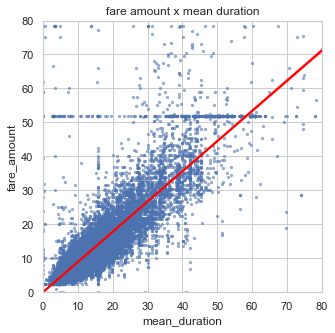

In [73]:
plt.figure(figsize=(5,5))
sns.set(style='whitegrid')
sns.regplot(x=df['mean_duration'],y=df['fare_amount'],
           scatter_kws={'alpha':0.5,'s':5},
           line_kws={'color' : 'red'})
plt.xlim(0,80)
plt.ylim(0,80)
plt.title('fare amount x mean duration')


Text(0.5, 1.0, 'fare amount x mean distance')

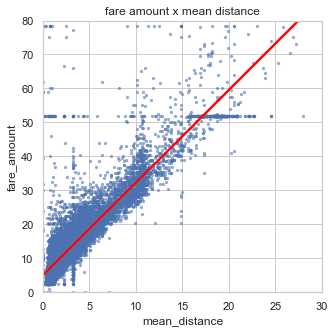

In [79]:
plt.figure(figsize=(5,5))
sns.set(style='whitegrid')
sns.regplot(x=df['mean_distance'],y=df['fare_amount'],
           scatter_kws= {'alpha':0.5,'s':5},
           line_kws={'color':'red'})
plt.xlim(0,30)
plt.ylim(0,80)
plt.title('fare amount x mean distance')

In [85]:
rush_hour = []
for i in df['pickup_hour']:
    if 6 <= i <10:
        rush_hour.append(1)
    elif 16 <= i < 20:
        rush_hour.append(1)
    else:
        rush_hour.append(0)

In [90]:
df['rush_hour'] = rush_hour
df.loc[df['day'].isin(['Saturday','Sunday']),'rush_hour'] = 0

In [98]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,...,total_amount,pickup_hour,duration_minutes,day,month,duration_by_distance,pickup_dropof,mean_duration,mean_distance,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,100,231,1,13.0,...,16.56,8,14.066667,Saturday,March,4.211577,100 231,22.847222,3.521667,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,186,43,1,16.0,...,20.80,14,26.500000,Tuesday,April,14.722222,186 43,24.470370,3.108889,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,262,236,1,6.5,...,8.75,7,7.200000,Friday,December,7.200000,262 236,7.250000,0.881429,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,188,97,1,20.5,...,27.69,13,30.250000,Sunday,May,8.175676,188 97,30.250000,3.700000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,4,112,2,16.5,...,17.80,23,16.716667,Saturday,April,3.825324,4 112,14.616667,4.435000,0


In [104]:
df2 = df[['fare_amount','VendorID','passenger_count','mean_duration','mean_distance','rush_hour']]

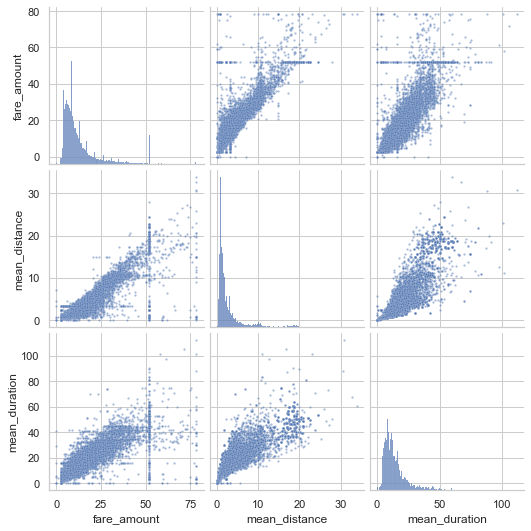

In [105]:
sns.pairplot(df2[['fare_amount','mean_distance','mean_duration']],
            plot_kws={'alpha':0.5,'s':5})

<AxesSubplot:>

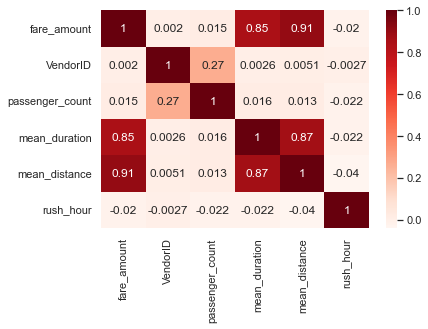

In [106]:
sns.heatmap(df2.corr(method='pearson'), annot=True ,cmap='Reds')

In [109]:
x = df2.drop(['fare_amount'],axis=1)

In [111]:
y = df2['fare_amount']

In [114]:
x['VendorID'] = x['VendorID'].astype('str')

In [115]:
x = pd.get_dummies(x,drop_first=True)